In [1]:
# Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

2023-03-21 18:56:25.120092: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Read in data
data = Path("student_loans.csv")
df = pd.read_csv(data)
df

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# Create the features (X) and target (y) sets
X = df.iloc[:, 0:11].values
y = df["credit_ranking"].values

In [4]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [5]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

2023-03-21 18:57:56.951223: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Compile the model--since predicting for continuous number (see y column) NOT class(just 0 or 1) we need to use mse
# the binary_crossentropy & accuracy is for 0 vs 1 ... need to know data --> what the y column is
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
# validation split is alt to train test split (not above) --> 0.3 is the amount of test data (30%)
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 6ms/step - loss: 36.3817 - mse: 36.3817 - val_loss: 30.2248 - val_mse: 30.2248
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 32.1340 - mse: 32.1340 - val_loss: 27.0251 - val_mse: 27.0251
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 28.6350 - mse: 28.6350 - val_loss: 24.1405 - val_mse: 24.1405
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 25.6466 - mse: 25.6466 - val_loss: 21.7668 - val_mse: 21.7668
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 23.1045 - mse: 23.1045 - val_loss: 19.6026 - val_mse: 19.6026
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 20.8773 - mse: 20.8773 - val_loss: 17.6406 - val_mse: 17.6406
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 18.8812 - mse: 18.8812 - val_loss: 15.9226 - val_mse: 15.9226
Epoch 8/200
35/35 [==============================] - 0s

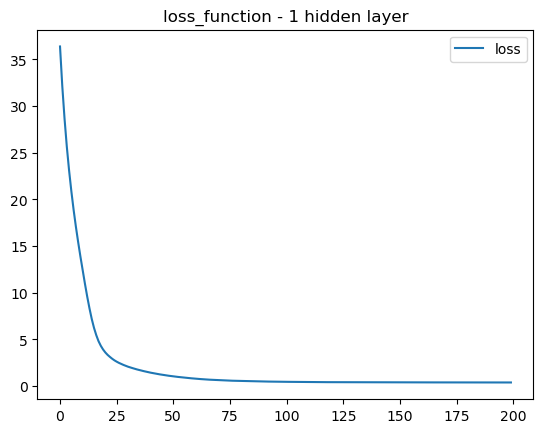

In [7]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [8]:
# can deep nn do better??
# Define the model - deep neural net
number_input_features = 11
hidden_nodes_layer1 = 2
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer -- input and 1st hidden layer
nn.add(
    Dense(units=2, input_dim=11, activation="relu")
)
# Second hidden layer -- this is what makes it a deep NN
nn.add(Dense(units=4, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [9]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model --> the validation splits replaces train/test split, 0.3 means 30% for test data
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 5ms/step - loss: 23.9665 - mse: 23.9665 - val_loss: 26.4767 - val_mse: 26.4767
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 21.6379 - mse: 21.6379 - val_loss: 24.5227 - val_mse: 24.5227
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 19.2933 - mse: 19.2933 - val_loss: 22.2753 - val_mse: 22.2753
Epoch 4/200
35/35 [==============================] - 0s 3ms/step - loss: 17.0614 - mse: 17.0614 - val_loss: 20.0204 - val_mse: 20.0204
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 15.1657 - mse: 15.1657 - val_loss: 17.8412 - val_mse: 17.8412
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 13.6177 - mse: 13.6177 - val_loss: 15.7816 - val_mse: 15.7816
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 12.3105 - mse: 12.3105 - val_loss: 13.9207 - val_mse: 13.9207
Epoch 8/200
35/35 [==============================] - 0s

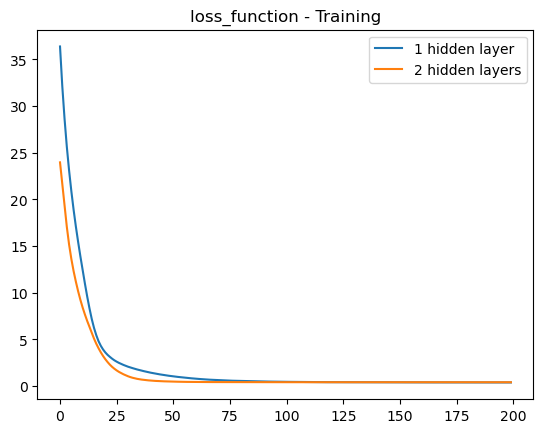

In [10]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

In [11]:
# in plot the 2 hidden layer achieves the result FASTER so its the better choice

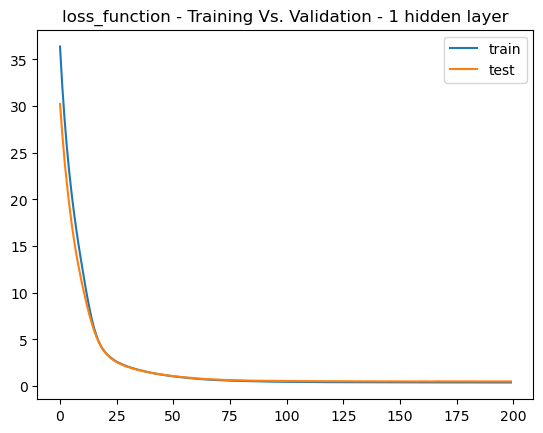

In [12]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

In [13]:
# above is model 1 only .. training data vs testing data (val_loss is test)
# if had overfitting the training curve would look great but the test line would be bad, wouldnt reach

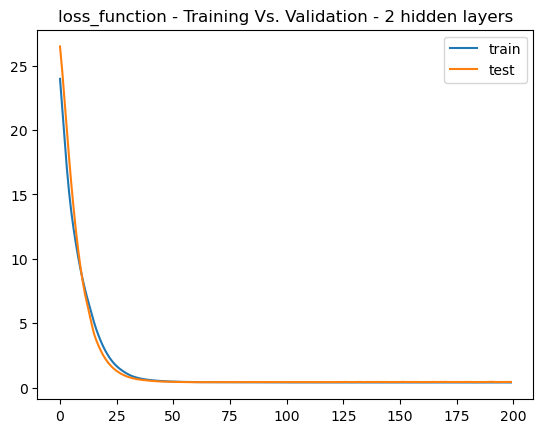

In [14]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()

In [15]:
# again .. above shows no over fitting